# Customer Churn Analysis: Syria Tel

## Introduction

In this project I will be analazing the factors that affect a customer decision to churn on a telecommunications company, in this case Syria Tel, as well as computing the probability of a customer to churn. For this objective I will be developing different prediction models using different learners and different variables to achieve the best model possible and increase the prediction capability of the analysis.

## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../Data/churn_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

As we can observe in the above cell, the dataframe consists on 20 different variables, from which 4 are composed of string values: state, phone number, international plan and voice mail plan; the variable that I will be analysing, churn, is composed of boolean values and the rest of the columns are composed of numeric values.

In [4]:
new_index = []
for n in data.columns:
    x = n.replace(" ", "_")
    new_index.append(x)
data.columns = new_index

In the above cell I changed the name of the columns so they are more easily replicable in further exploration.

In [5]:
data.churn = data["churn"].apply(lambda x: 1 if x == True else 0)

In [6]:
data["voice_mail_plan"] = data["voice_mail_plan"].apply(lambda x: 1 if x == "yes" else 0)
data["international_plan"] = data["international_plan"].apply(lambda x: 1 if x == "yes" else 0)

I transformed the churn, voice mail plan and international columns so that mathematical computations can be performed on it. The values in which churn was True now have value 1, false values now have value equal to 0, same happens in the case of the other two columns but with yes or no values.

In [7]:
data = pd.concat([data, pd.get_dummies(data.area_code, prefix = "area_code")], axis = 1)
data = data.drop("area_code", axis = 1)

On the above cell I created dummie columns for the area code variable of the dataset this gave me three columns with different area codes.

In [8]:
data = data.drop(["state", "phone_number"], axis = 1)

Finally, I dropped the phone number and State columns as they are not relevant for the study.

In [9]:
checking_outliers = ["account_length", "number_vmail_messages", "total_day_minutes",
                     "total_day_calls",'total_day_charge',
                     'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                     'total_night_minutes', 'total_night_calls', 'total_night_charge',
                     'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                     'customer_service_calls']

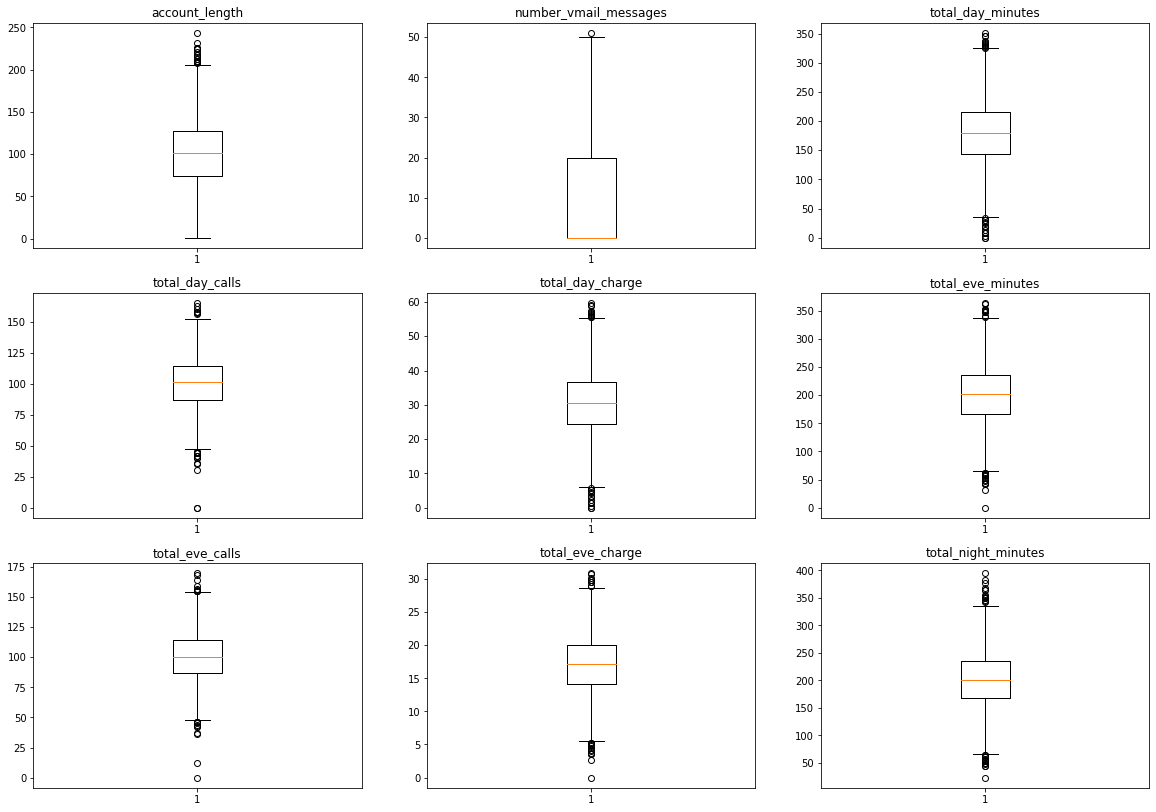

In [10]:
fig = plt.figure(figsize = (20,24))

for sp in range (0,9):
    
    ax = fig.add_subplot(5,3,sp+1)
    
    ax.boxplot(x= data[checking_outliers[sp]])
    
    plt.title(checking_outliers[sp])

plt.show()

In the above cell I created boxplots in order to study the distribution of the variables in the dataset. By looking at the graphs you can tell that there are no apparent extreme outliers that may affect the predictive ability of the model.

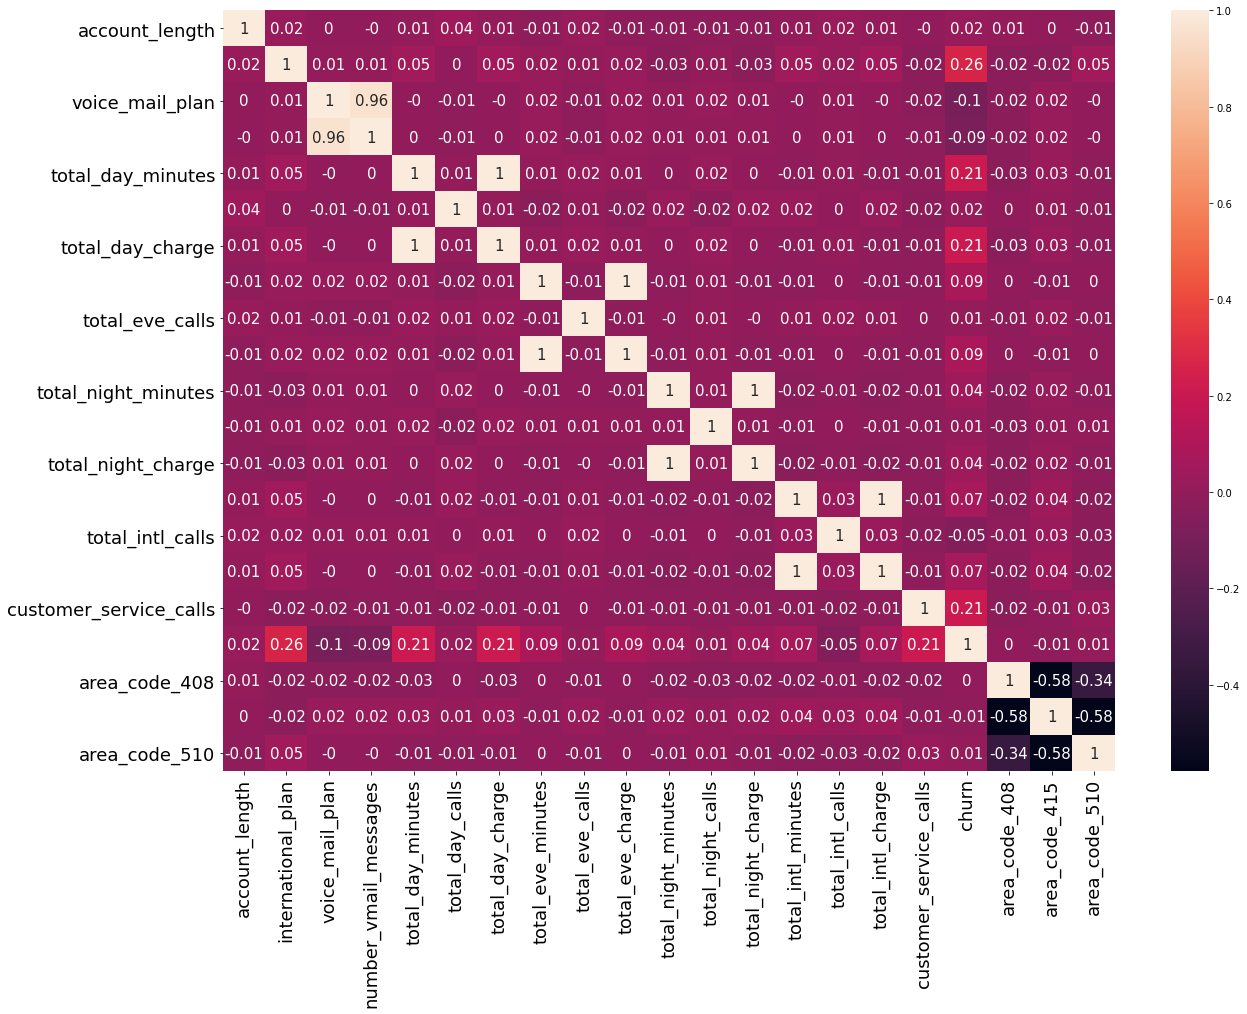

In [11]:
corr = round(data.corr(),2)

g = sns.heatmap(corr, annot=True, annot_kws={"size":15})

plt.autoscale()

g.figure.set_size_inches(20,14)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

As a last chart, I created a heatmap showing the correlation coefficient between the all the variables in the dataset. This graph reveals a great deal of information about the data. First of all, there are no variables that have a significant correlation coefficient with our dependent variable (churn); secondly, there are some variables that have perfect correlation between eachother, so at least one of those must be dropped in order to preserve the accuracy of our model.

Variables that have perfect correlation between eachother also share the same correlation coefficient with the dependent variable, therefore it does not make a statistical difference which one to chose. In this case I will drop the total columns i.e. total_day_minutes, total_night_minutes, total_eve_minutes & total_intl_minutes.

In [12]:
data = data.drop(["total_day_minutes", "total_night_minutes", 
                  "total_eve_minutes",  "total_intl_minutes"], axis = 1)

Finally I will export the resulting data to a separate dataset for further analysis in the Models notebook.

In [13]:
data.to_csv("../Data/churn_data_clean", index = False)